# Proposal Topic Modelling

In [23]:
# Import libs
import json
import os
import pandas as pd
import re

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
staff = ["Andrew Hellman","John Butt","Charlie Petersen","Conrad Ramirez","Doug Johnson","Eric Bodenstab",
         "Mary Boechler","Matt Henderson","Mridhula Manoj","Lindsey Wickman","Luis Acosta","Erik Carlson",
         "Paul Deutsch","Jen Hanley","J. Luke Hodges","Will Kerns","Abdullah Kurkcu","Nikki Olson","Bob Smith",
         "Ron Lowe","Angela Eickelman","Robbert Wieder","Jason Berner","Rebecca Berner","Molly Thiebaut",
         "Joseph El- Hehiawy","Mustafa Al Ogaila","Bill Mischlich","Dave Wieder","Gabe Maliscke","Clint Knutson",
         "Don Nelson","Dominique Lopez","Grant Seger","Chad Stensland","Corey Maynard","Jason Orban","Morgan Wrasper",
         "Nick State","Carter Dahl","Jimmy Coffee","Brad Stangohr","Alex Ranz","AJ Tuck","Brad Niemela",
         "Dustin Kulseth","Marty Jenson","Jon Yocom","Brandon Bucholz","Bennett Pederson","Casey Bekkerus",
         "Chris Greve","Chris Smaaladen","Joe Wade","Justin Johnson","Lyle Zeren","Naga Talluri","Paul Pebler",
         "Reece Skarie","Thomas Reisdorf","Travis Berends","Travis DeJong","Zak Grabowski","Paul Moreau",
         "Steve Windish","Kory Kleinknecht","John Kilpatrick","Daylin Gray","Thomas Fakler","Josh Kueber",
         "Laeken Carey","Clark Roberts","Rachel Heinzen","Melanie Muncy","Tanner Blinsky","Sawyer Kenney",
         "Luke Arnold","Rick Archer","Roger Clay","Brett Lovro","Brian Hiles","Charlie Bechtold","Cassie Borden","Jordon Gall"]

city_county = ['Ulteig','city','county','town','CDOT', 'Adams', 'Arapahoe', 'Arvada', 'Boulder', 'Brighton', 'Broomfield', 'Buena Vista', 'Castle Pines', 
               'Castle Rock', 'Centennial', 'Clear Creek', 'Commerce City', 'Denver', 'Englewood', 'Federal Heights',
              'Fort Morgan', 'Greeley', 'Greenwood Village', 'Jefferson', 'Lafayette', 'Lochbuie', 'Mesa', 'Northglenn', 'Parker',
              'Steamboat', 'Superior', 'Vail', 'Weld', 'Westminster', 'Windsor']

staff = [x.lower() for x in staff]
city_county = [x.lower() for x in city_county]


C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Import files -> Create DF 
directory = '../jsons/'
df = pd.DataFrame(columns=["Filename", "Text"])

# Convert the titles to lowercase
df['Text'] = df['Text'].map(lambda x: x.lower())
# Remove punctuation
df['Text'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'].apply(lambda x: [item for item in x if item not in stop])


# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    text = ""
    
    # Dump to file
    with open(f, "r") as json_file: 
        data = json.load(json_file)
        
    for key in data:
        x = data[key].lower()
        key = key.lower()
        for member in staff:
            x = x.replace(member.lower(), ' ')
            key = key.replace(member.lower(), ' ')
        for city in city_county:
            x = x.replace(city.lower(), ' ')
            key = key.replace(city.lower(), ' ')
        text = text + " " + key + " " + x
    filename = filename.rstrip(".json")
    df = df.append({"Filename":filename, "Text":text}, ignore_index=True)
          
df.head()

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence \.
<>:8: DeprecationWarning: invalid escape sequence \.
<>:8: DeprecationWarning: invalid escape sequence \.
<ipython-input-25-b0df88721ad7>:8: DeprecationWarning: invalid escape sequence \.
  df['Text'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


,Filename,Text
0,17.00532 Buena Vista CO_Midland Hills Bridge T...,1. scope of work a. approach b. crew & volunt...
1,18.00308 Jefferson County_RoadwaySignage_Mar13...,100% employee-owned office 5575 dtc parkw...
2,19.00064_City of Centennial Orchard Road Trail...,design experience project type role client ...
3,19.00150_Town of Vail_Gore Valley Trail_Feb19_...,"office 5575 dtc parkway suite 200 , co 8..."
4,19.01863 CDOT R2 I-25 Raton Pass Corridor Prop...,key personnel & organizational chart has as...


In [26]:
# Remove punctuation
df['text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())
#df['text_processed'].head()

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-26-33697d476421>:2: DeprecationWarning: invalid escape sequence \.
  df['text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


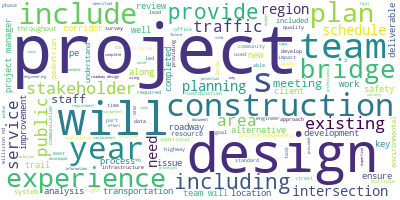

In [27]:
from wordcloud import WordCloud

# Join texts
long_string = ','.join(list(df['text_processed'].values))

# Generate a word cloud
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# LDA

In [28]:
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['design', 'project', 'ulteig', 'team', 'projects', 'nd'])    # Note - add or remove misc. stopwords here

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
#print("some example text data:", data_words[:1][0][:30])

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
import gensim

# User input: number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=1)

'''
# Print the Keyword in the topics
from pprint import pprint
pprint(lda_model.print_topics())
'''

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n# Print the Keyword in the topics\nfrom pprint import pprint\npprint(lda_model.print_topics())\n'

## Visualization

In [33]:
# Uncomment the import below for pyLDAvis versions > 3.2.2
import pyLDAvis.gensim_models as gm 
# Import for pyLDAvis-version = 3.2.2
#import pyLDAvis.gensim as gm 
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_' + str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gm.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.003618 -0.000736       1        1  37.794394
4      0.003717 -0.002183       2        1  22.699204
3     -0.001340 -0.002680       3        1  16.206037
1     -0.000522  0.003507       4        1  13.474328
0      0.001762  0.002092       5        1   9.826036, topic_info=             Term        Freq       Total Category  logprob  loglift
304    experience  435.000000  435.000000  Default  30.0000  30.0000
172  construction  528.000000  528.000000  Default  29.0000  29.0000
590          plan  403.000000  403.000000  Default  28.0000  28.0000
137            co  158.000000  158.000000  Default  27.0000  27.0000
634        public  386.000000  386.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
729      schedule   17.396920  174.426729   Topic5  -5.9026   0.0149
839         trail   17.109743  170.525977   Topic5  -5.9192   0.0209
233   development   17.416647  184.128667   Topic5  -5.9014  -0.0381
34           also   18.342754  202.982959   Topic5  -5.8496  -0.0838
619       process   20.255479  249.411436   Topic5  -5.7504  -0.1905

[443 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.384623  able
1         2  0.278851  able
1         3  0.144233  able
1         4  0.096156  able
1         5  0.105771  able
...     ...       ...   ...
916       1  0.392060  zyne
916       2  0.196030  zyne
916       3  0.196030  zyne
916       4  0.196030  zyne
916       5  0.196030  zyne

[1278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 2, 1])

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


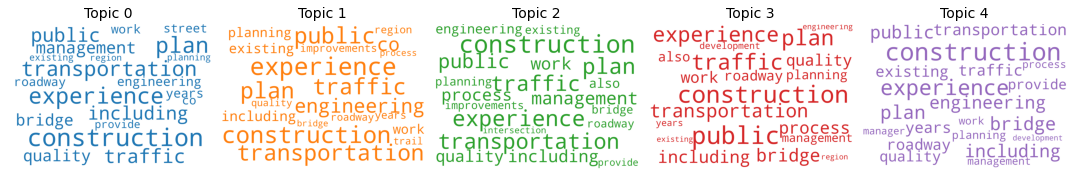

In [34]:
# Wordcloud of LDA, top 10 words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

topics = lda_model.show_topics(num_topics=5, num_words=20, formatted=False)

# Note - change first 2 numbers (row, cols) when changing num. of topics
fig, axes = plt.subplots(1, 5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud = WordCloud(stopwords=stop_words, background_color='white', width=2500, height=1800, max_words=20, colormap='tab10', \
                      color_func=lambda *args, **kwargs: cols[i], prefer_horizontal=1.0)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=14))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# NMF - better for texts w similar topics

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF IDF
texts = df['text_processed']
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf.toarray()

# NMF - Input: change n_components to desired number of topics
nmf_model = NMF(n_components=5)
nmf_model.fit(tfidf)

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


NMF(n_components=5)

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


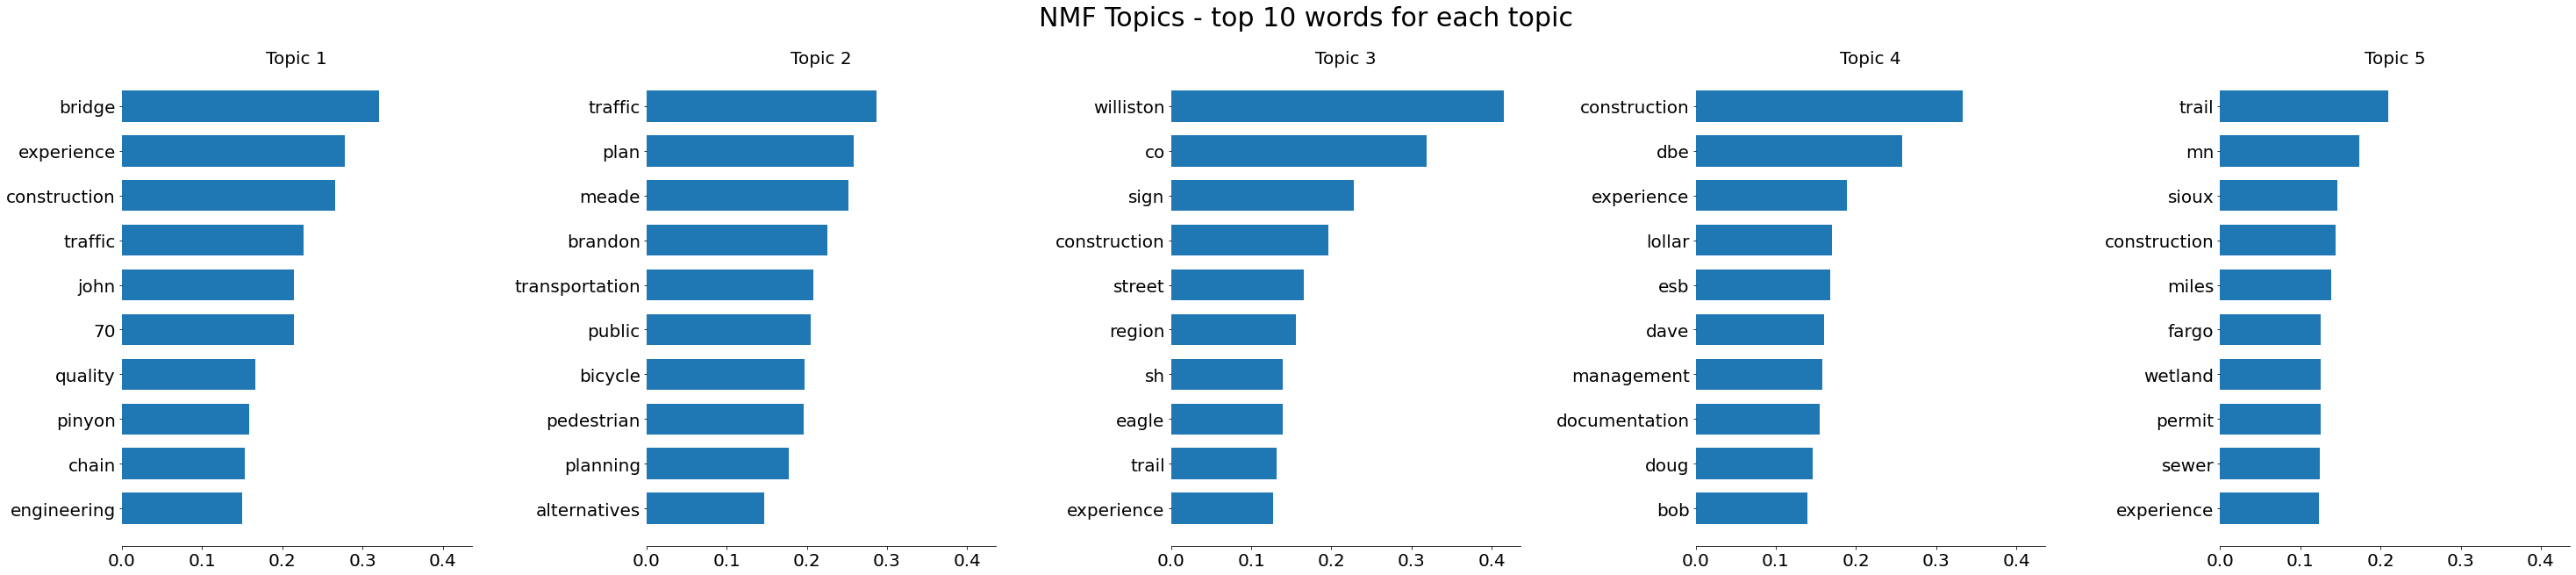

In [36]:
# User inputs: # of words to display, and major title
n_top_words = 10
title = "NMF Topics - top " + str(n_top_words) + " words for each topic"

# plot top 10 words for each topic
feature_names = tfidf_vectorizer.get_feature_names()
fig, axes = plt.subplots(1, 5, figsize=(50, 10), sharex=True)    # Note - change (rows, cols) to match num. topics
axes = axes.flatten()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict={'fontsize': 20})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=30)

plt.subplots_adjust(wspace=0.50)
plt.show()